## Prep

In [1]:
!pip install gradio adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.1 MB/s eta 0

## Data prep

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

# TODO: change the data rootpath
project_root = '/content/drive/MyDrive/24 Spring/IM5060_Social Media Analytics/社群媒體分析'
data_path = os.path.join(project_root, 'Data')

Mounted at /content/drive


In [3]:
import pandas as pd
import json

# TODO: change the data path
json_filepath = os.path.join(data_path, 'actors network data/actors_network_new.json')
with open(json_filepath) as file:
    data = json.load(file)

print("Node:", data['nodes'][0])
print("Edge:", data['links'][0])

Node: {'id': 0, 'name': 'AamirKhan', 'gender': 2.0, 'popularity': '11.253', 'Date of Birth': '0', 'Birth City': 0, 'Birth Country': 0, 'Height (Inches)': 0.0, 'Ethnicity': 0, 'NetWorth': 0.0, 'Age': 0.0}
Edge: {'source': 0, 'target': 1, 'value': -1}


In [4]:
actors_name_list = [data['nodes'][i]['name'] for i in range(len(data['nodes']))]        # Indexes are sorted, [0, 1941]
print(f"Shape of actors_name_list: {len(actors_name_list)}")
print(f"actors_name_list: {actors_name_list[:10]}")

Shape of actors_name_list: 1942
actors_name_list: ['AamirKhan', 'AbhishekBachchan', 'FatimaSanaShaikh', 'HrithikRoshan', 'BárbaraMori', 'ShahRukhKhan', 'RaniMukerji', 'SalmanKhan', 'KareenaKapoorKhan', 'PreityZinta']


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for node in data['nodes']:
    G.add_node(node['id'], label=node.get('name', ''))
for edge in data['links']:
    if (edge['value']==1):
        G.add_edge(edge['source'], edge['target'])

print("--------------- Network object created. ---------------")
print(G)

--------------- Network object created. ---------------
Graph with 1942 nodes and 1325 edges


## Draw NetworkX Graph

Number of nodes with neighbors: 1304


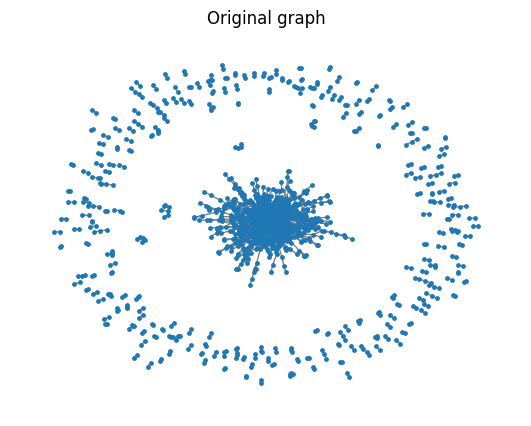

In [6]:
## Remove nodes with no neighbors
nodes_to_remove = [node for node in G.nodes() if G.degree(node) == 0]
G.remove_nodes_from(nodes_to_remove)
print(f"Number of nodes with neighbors: {G.number_of_nodes()}")

## Filter by position
pos = nx.spring_layout(G, seed=42)      # positions for all nodes
x_min, x_max = -0.3, 0.3
y_min, y_max = -0.3, 0.3
selected_nodes = [node for node, (x, y) in pos.items() if x_min <= x <= x_max and y_min <= y <= y_max]

nx.draw_networkx_nodes(G, pos, node_size=6, node_color='tab:blue')
nx.draw_networkx_edges(G, pos, edge_color='gray')

plt.axis('off')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.title("Original graph")
plt.show()

## Select k-hop neighbors of nodes

Selected nodes: {386, 1412, 773, 650, 651, 1163, 142, 402, 1683, 788, 403, 668, 545, 1442, 35, 36, 163, 551, 302, 431, 1457, 434, 1074, 433, 51, 179, 186, 699, 704, 68, 332, 333, 204, 595, 1236, 469, 86, 87, 728, 1626, 222, 1376, 481, 356, 358, 1004, 1144, 509, 254}


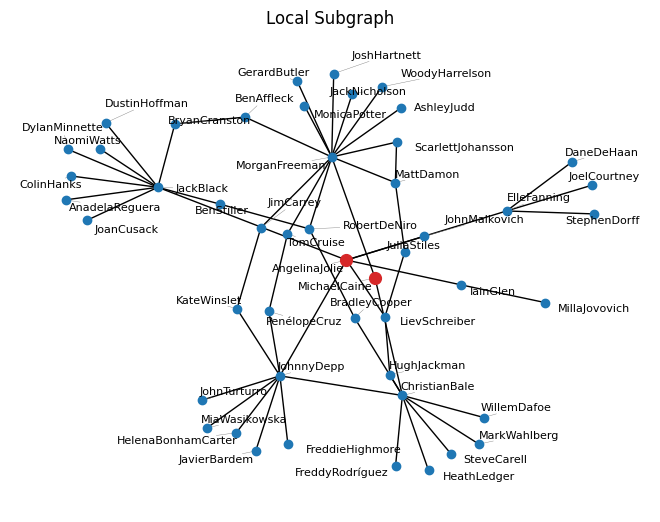

In [7]:
from adjustText import adjust_text

img_path = os.path.join(project_root, 'Code/temp')

def k_hop_neighbors(G, nodes, k):
    all_neighbors = set(nodes)
    for _ in range(k):
        neighbors = set()
        for node in all_neighbors:
            neighbors.update(G.neighbors(node))
        all_neighbors.update(neighbors)
    return all_neighbors

def view_local_subgraph(highlight_nodes, k_hops, save=False):
    selected_nodes = k_hop_neighbors(G, highlight_nodes, k=k_hops)
    print(f"Selected nodes: {selected_nodes}")

    G_sub = G.subgraph(selected_nodes)
    pos = nx.spring_layout(G_sub, seed=42)      # positions for all nodes
    nx.draw_networkx_nodes(G_sub, pos, node_size=36, node_color='tab:blue')
    nx.draw_networkx_edges(G_sub, pos, edge_color='black')
    nx.draw_networkx_nodes(G_sub, pos, nodelist=highlight_nodes, node_color='tab:red', node_size=72)        # highlight the input nodes

    # nx.draw_networkx_labels(G_sub, pos, labels={node: G_sub.nodes[node]['label'] for node in G_sub.nodes()}, font_size=8)
    texts = []
    for node, (x, y) in pos.items():
        texts.append(plt.text(x, y, str(data['nodes'][node]['name']), fontsize=8, ha='center', va='center'))
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.3))

    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.title("Local Subgraph")
    if save:
        filepath = os.path.join(img_path, f'local_subgraph_{"_".join(map(str, highlight_nodes))}.png')
        plt.savefig(filepath)
    plt.show()
    plt.close()

view_local_subgraph([222, 332], 2, save=True)

## EGES results

**To-do**
1. Finalize decision for similarity threshold.

In [8]:
import numpy as np

# TODO: change the data path
filepath = os.path.join(data_path, 'embeddings/eges_embeddings.csv')
node_emb = np.loadtxt(filepath, delimiter=',')
print(np.shape(node_emb))

(1942, 20)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

def calc_similarity(index_1, index_2):
    return cosine_similarity(node_emb[index_1].reshape(1, -1), node_emb[index_2].reshape(1, -1))[0, 0]

calc_similarity(1, 2)

0.04825961100405954

 1: 1447 edges (Similarity scores in [-0.5003, 0.9336])
 0: 582 edges (Similarity scores in [-0.5977, 0.8573])
-1: 657 edges (Similarity scores in [-0.5656, 0.7665])


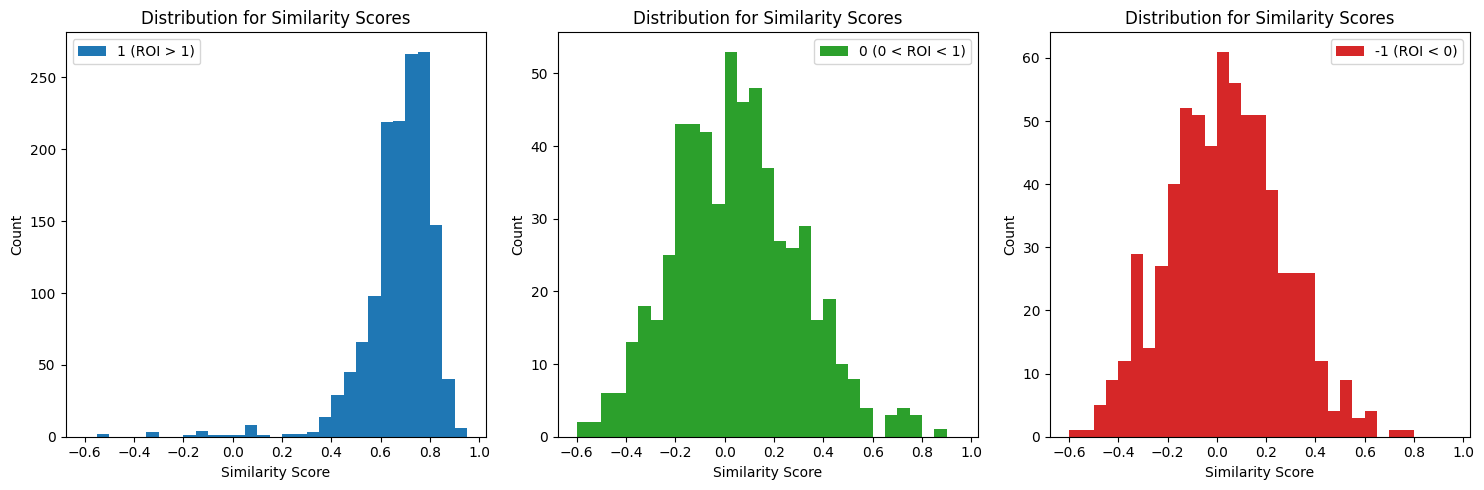

In [10]:
import matplotlib.pyplot as plt

records = {1: [], 0: [], -1: []}
for edge in data['links']:
    answer = edge['value']
    similarity = calc_similarity(edge['source'], edge['target'])
    records[answer].append(similarity)

## View occurrences
for k, v in records.items():
    print(f'{k:2}: {len(v)} edges (Similarity scores in [{min(v):.4f}, {max(v):.4f}])')

## View distribution of similarities
bins = np.arange(-0.6, 1, 0.05)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(records[1], bins=bins, label='1 (ROI > 1)', color='tab:blue')
axs[1].hist(records[0], bins=bins, label='0 (0 < ROI < 1)', color='tab:green')
axs[2].hist(records[-1], bins=bins, label='-1 (ROI < 0)', color='tab:red')
for i in range(3):
    axs[i].set_xlabel('Similarity Score')
    axs[i].set_ylabel('Count')
    axs[i].legend()
    axs[i].set_title('Distribution for Similarity Scores')
plt.tight_layout()
plt.show()

## GCN Results

In [11]:
!pip install torch_geometric        # for GCN and SEAL inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00


In [12]:
# os.chdir(os.path.join(project_root, 'Code/GCN_Benchmark'))
# %run GCN_Inference.ipynb

## SEAL results

In [13]:
# os.chdir(os.path.join(project_root, 'Code'))
# %run SEAL_MOVIE/SEAL_Inference.ipynb

## Gradio Demo

Change `project_root` variables for all the notebooks to your path before execution.

In [ ]:
import gradio as gr
import torch
from PIL import Image

img_path = os.path.join(project_root, 'Code/temp')

def view_local_graph(node_1, node_2, k_hops, model):
    ## View graph
    view_local_subgraph([node_1, node_2], k_hops, save=True)
    filepath = os.path.join(img_path, f'local_subgraph_{node_1}_{node_2}.png')
    img = Image.open(filepath)

    ## View prediction results
    if model=='SEAL':
        os.chdir(os.path.join(project_root, 'Code/SEAL_MOVIE'))
        %run SEAL_Inference.ipynb
        ## variables from SEAL_Inference.ipynb are used below
        model_SEAL = GCN(HIDDEN_CHANNEL, NUM_LAYERS, MAX_Z, dataset,
                         USE_FEATURE, node_embedding=NODE_EMBEDDINGS).to(device)
        model_state = torch.load(os.path.join(MODEL_PATH, MODEL_NAME))
        model_SEAL.load_state_dict(model_state)

        observed, seal_pred = SEAL_inference(model_SEAL, dataset, (node_1, node_2), all_pos_edges)
        results_pred = True if seal_pred == 1 else False
        print(f'SEAL: Observed: {observed} -> Prediction: {seal_pred}')
    elif model=='GCN':
        os.chdir(os.path.join(project_root, 'Code/GCN_Benchmark'))
        %run GCN_Inference.ipynb
        ## variables from GCN_Inference.ipynb are used below
        model_GCN = GCN(HIDDEN_CHANNEL, NUM_LAYERS, USE_GRAPH_STAT, DROPOUT)

        observed, gcn_pred = GCN_inference(model_GCN, (node_1, node_2))
        results_pred = True if gcn_pred == 1 else False
        print(f'GCN: Observed: {observed} -> Prediction: {gcn_pred}')
    elif model=='EGES':
        sim_score = calc_similarity(node_1, node_2)
        results_pred = True if sim_score > 0.5 else False
        print(f'EGES: {sim_score}, {results_pred}')

    statement = f"{model} predicts that there {'is an' if results_pred else 'is no'} edge between the two nodes."
    return img, statement

demo = gr.Interface(
    fn=view_local_graph,
    inputs=[
        gr.Dropdown(actors_name_list, label="Actor 1", type="index"),
        gr.Dropdown(actors_name_list, label="Actor 2", type="index"),
        gr.Dropdown([1, 2, 3], label="Number of hops", info="Show the h-hop neighborhood of the nodes on the subgraph"),
        gr.Dropdown(['SEAL', 'GCN', 'EGES'], label="Model", info="Select a model for prediction")
    ],
    outputs=[
        gr.Image(label="Local Subgraph"),
        gr.Textbox(label="Prediction")
    ],
    examples=[
        ["RobertDowneyJr.", "ChrisEvans", 2, "SEAL"],
        ["CillianMurphy", "EmilyBlunt", 2, "SEAL"],
        ["EmmaStone", "MarkRuffalo", 2, "SEAL"],
        ["TomHiddleston", "NataliePortman", 2, "EGES"]
    ]
)
if __name__ == "__main__":
    demo.launch(debug=True, share=True)         # share=True

## To-do: 3 pairs of examples

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cfa1a0c8517ba04cc8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Selected nodes: {899, 902, 383, 906, 1038, 527, 1045, 663, 664, 537, 157, 798, 1825, 161, 293, 294, 935, 1070, 177, 434, 179, 181, 310, 55, 56, 57, 958, 67, 580, 838, 328, 718, 337, 81, 83, 729, 1243, 95, 107, 504, 121, 634, 1403, 254, 511}
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 1/1 [00:00<00:00, 94.93it/s]


observed: 1 -> inferred: 1
SEAL: Observed: 1 -> Prediction: 1


Selected nodes: {513, 1025, 522, 523, 780, 273, 786, 544, 546, 547, 1576, 1323, 1072, 51, 52, 838, 329, 592, 81, 80, 346, 347, 96, 355, 357, 621, 373, 388, 141, 1166, 662, 406, 153, 154, 164, 1189, 165, 431, 688, 434, 179, 1204, 693, 1715, 446, 704, 193, 976, 217, 218, 1499, 481, 231, 233, 1003, 497, 254}
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 1/1 [00:00<00:00, 143.20it/s]


observed: 1 -> inferred: 1
SEAL: Observed: 0 -> Prediction: 1


Selected nodes: {1162, 394, 397, 1171, 1173, 406, 154, 282, 540, 165, 551, 40, 297, 43, 44, 1453, 1075, 692, 1722, 186, 69, 70, 71, 200, 72, 73, 326, 77, 84, 85, 217, 92, 861, 93, 860, 866, 357, 874, 111, 1008, 879, 1138, 118, 120, 891}
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 1/1 [00:00<00:00, 136.92it/s]


observed: 1 -> inferred: 1
SEAL: Observed: 0 -> Prediction: 1


Selected nodes: {406, 279, 798, 161, 162, 1070, 688, 690, 434, 55, 57, 830, 580, 1222, 1735, 328, 590, 592, 466, 728, 601, 356, 364, 365, 110, 239, 240, 876, 498, 118, 375, 760, 374, 1782}
EGES: 0.6464377503189933, True
